# Analyze and plot results

In [2]:
import torch
import matplotlib.pyplot as plt

In [21]:
plt.rcParams.update({'font.size': 20})

## MNIST

In [19]:
# non_linearity="ReLU"
non_linearity="Sigmoid"
# budget, fr_TSSA = torch.load('./output/Dormammu/MNIST/fooling_rates_compared_nsample=10000_start=0_batch=0_StandardTwoStepSpectralAttack_budget-rates.pt', map_location=torch.device('cpu'))
# budget, fr_OSSA = torch.load('./output/Dormammu/MNIST/fooling_rates_compared_nsample=10000_start=0_batch=0_OneStepSpectralAttack_budget-rates.pt', map_location=torch.device('cpu'))
budget, fr_TSSA = torch.load(f'./output/Thanos/MNIST/fooling-rates/aa-ossa-tssa/fooling_rates_compared_nsample=10000_start=0_nl={non_linearity}()_batch=0_TwoStepSpectralAttack_budget-rates.pt', map_location=torch.device('cpu'))
budget, fr_OSSA = torch.load(f'./output/Thanos/MNIST/fooling-rates/aa-ossa-tssa/fooling_rates_compared_nsample=10000_start=0_nl={non_linearity}()_batch=0_OneStepSpectralAttack_budget-rates.pt', map_location=torch.device('cpu'))
budget, fr_AA = torch.load(f'./output/Thanos/MNIST/fooling-rates/aa-ossa-tssa/fooling_rates_compared_nsample=10000_start=0_nl={non_linearity}()_batch=0_AdversarialAutoAttack_budget-rates.pt', map_location=torch.device('cpu'))
fr_TSSA, fr_OSSA, fr_AA = torch.tensor(fr_TSSA), torch.tensor(fr_OSSA), torch.tensor(fr_AA)

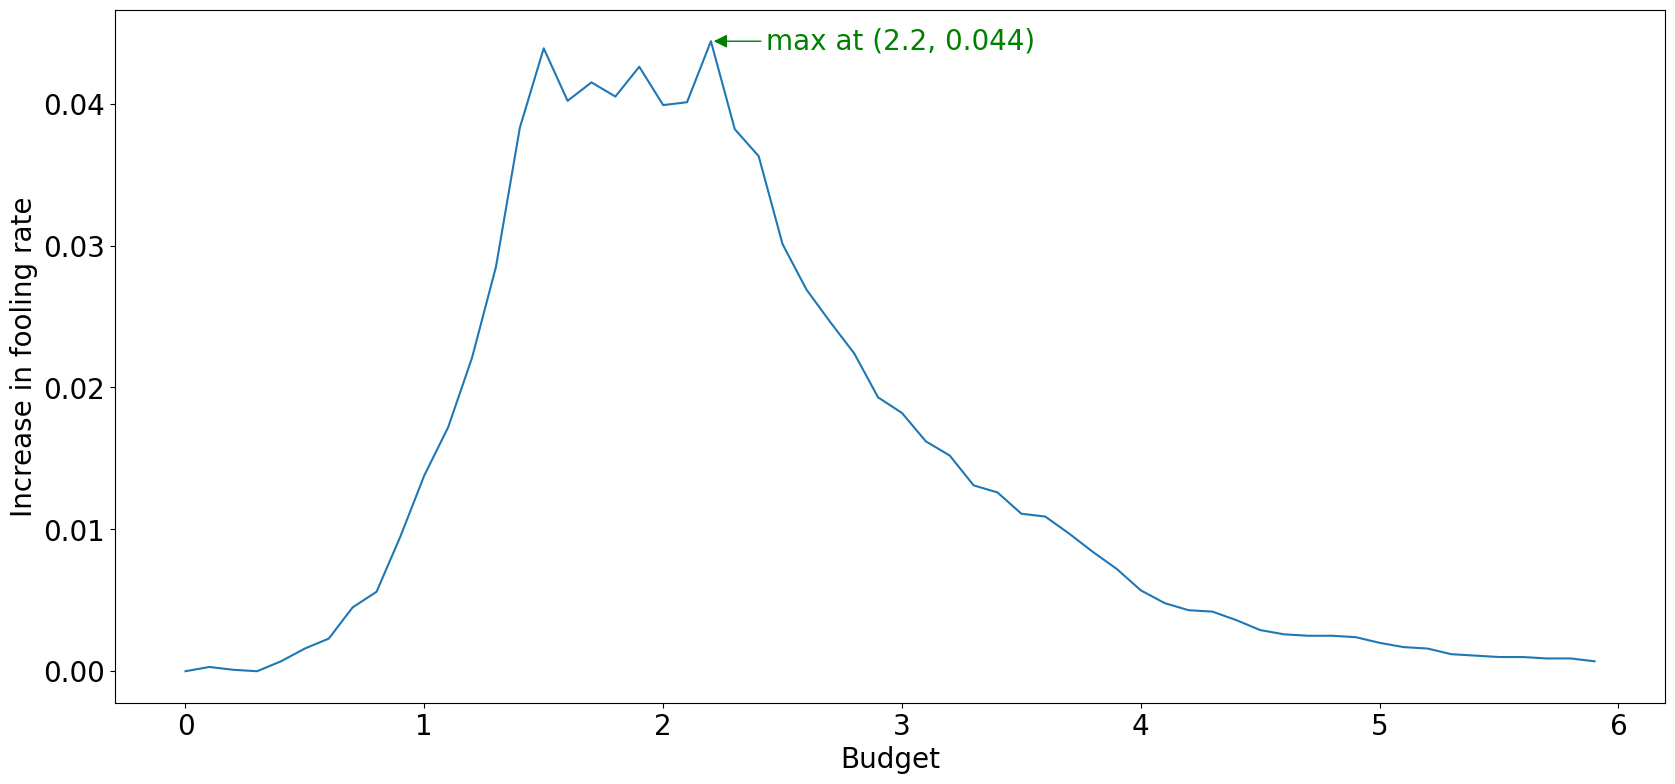

In [22]:
fr_diff = fr_TSSA - fr_OSSA
max_index = torch.argmax(fr_diff)
max_budget = budget[max_index]
max_diff = fr_diff[max_index]


plt.figure(figsize=(20,9))
plt.plot(budget, fr_diff)
plt.xlabel('Budget')
plt.ylabel('Increase in fooling rate')
plt.xticks(range(0,7))
plt.annotate(text=f'max at ({max_budget:.1f}, {max_diff:.3f})', ha='left', va='center', xy=(max_budget, max_diff), color="green", textcoords=('offset fontsize'), xytext=(2, 0), arrowprops={'color': 'green', 'arrowstyle': '-|>'},)
# plt.annotate(text=f'{max_diff:.3f}', ha = "center", va="bottom", xy=(max_budget, 0.), xytext=(max_budget, max_diff), arrowprops={'arrowstyle': '-', 'color': 'green', 'ls': '--'}, color = 'green')
# plt.annotate(text=f'{max_diff:.3f}', ha = "right", va="center", xy=(max_budget, max_diff), xytext=(0., max_diff), arrowprops={'arrowstyle': '-', 'color': 'green', 'ls': '--'}, color = 'green')
# plt.annotate(text=f'{max_budget:.1f}', ha = "center", va="top", xy=(max_budget, max_diff), xytext=(max_budget, 0.), arrowprops={'arrowstyle': '-', 'color': 'green', 'ls': '--'}, color = 'green')
# plt.savefig('./output/Dormammu/MNIST/fooling_rates_increase_plain.pdf', transparent=True, dpi=None)
plt.savefig(f'./output/Thanos/MNIST/fooling-rates/fooling_rates_increase_nsample=10000_nl={non_linearity}_tssa-ossa_plain.pdf', transparent=True, dpi=None)
plt.show()

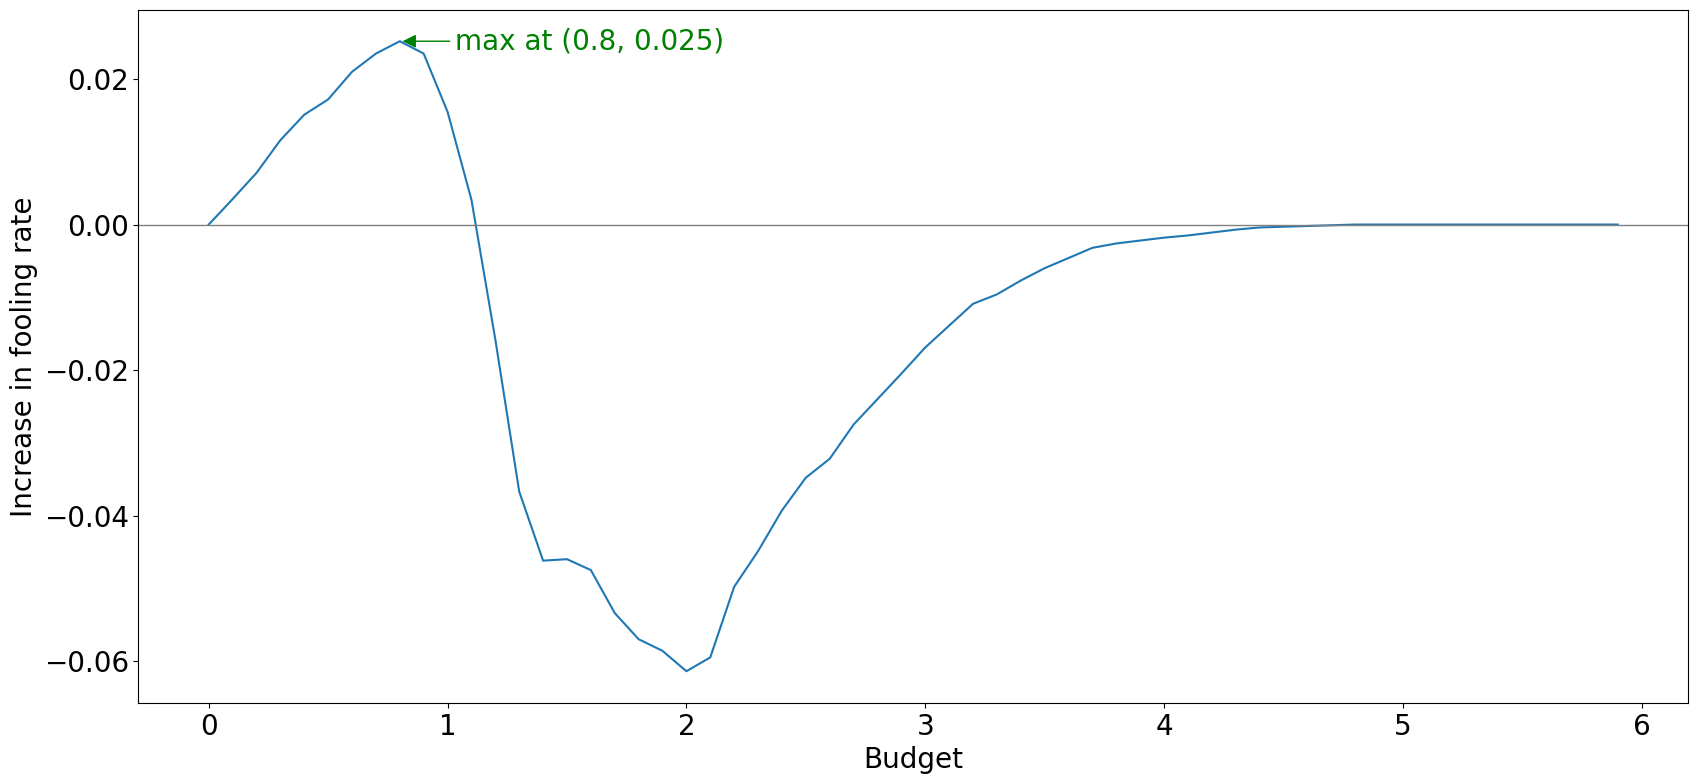

In [23]:
fr_diff = fr_TSSA - fr_AA
max_index = torch.argmax(fr_diff)
max_budget = budget[max_index]
max_diff = fr_diff[max_index]

plt.figure(figsize=(20,9))
plt.plot(budget, fr_diff)
plt.xlabel('Budget')
plt.ylabel('Increase in fooling rate')
plt.xticks(range(0,7))
plt.axhline(0, color='grey', lw='1')
# plt.annotate(text=f'{max_diff:.3f}', ha = "center", va="bottom", xy=(max_budget, 0.), xytext=(max_budget, max_diff), arrowprops={'arrowstyle': '-', 'color': 'green', 'ls': '--'}, color = 'green')
plt.annotate(text=f'max at ({max_budget:.1f}, {max_diff:.3f})', ha='left', va='center', xy=(max_budget, max_diff), color="green", textcoords=('offset fontsize'), xytext=(2, 0), arrowprops={'color': 'green', 'arrowstyle': '-|>'},)
# plt.plot(max_budget, max_diff, "go")
# plt.annotate(text=f'{max_diff:.3f}', ha = "right", va="center", xy=(max_budget, max_diff), xytext=(0., max_diff), arrowprops={'arrowstyle': '-', 'color': 'green', 'ls': '--'}, color = 'green')
# plt.annotate(text=f'{max_budget:.1f}', ha = "center", va="top", xy=(max_budget, max_diff), xytext=(max_budget, 0.), arrowprops={'arrowstyle': '-', 'color': 'green', 'ls': '--'}, color = 'green')
# plt.savefig('./output/Dormammu/MNIST/fooling_rates_increase_plain.pdf', transparent=True, dpi=None)
plt.savefig(f'./output/Thanos/MNIST/fooling-rates/fooling_rates_increase_nsample=10000_nl={non_linearity}_tssa-aa_plain.pdf', transparent=True, dpi=None)
plt.show()

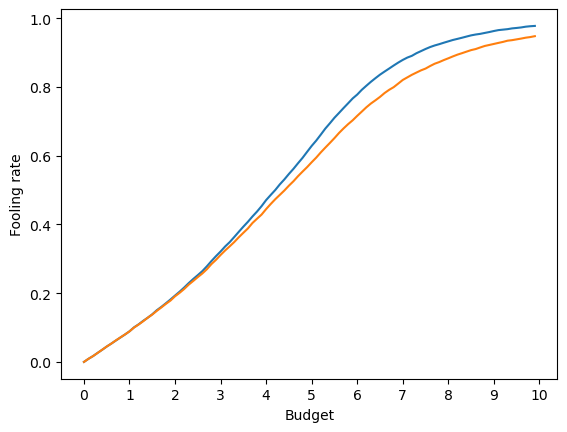

In [6]:
plt.plot(budget, fr_TSSA, label="TwoStepSpectralAttack")
plt.plot(budget, fr_OSSA, label="OneStepSpectralAttack")
plt.legend()
plt.xlabel('Budget')
plt.ylabel('Fooling rate')
plt.xticks(range(0,11))
plt.savefig('./output/Dormammu/MNIST/fooling_rates_compared_nsample=10000_start=0_batch=0_good_label.pdf', transparent=True, dpi=None)
plt.show()

## XOR

In [3]:
budget, fr_TSSA = torch.load('./output/XOR/fooling_rates_compared_nsample=5000_start=0_nl=Sigmoid()_batch=0_TwoStepSpectralAttack_budget-rates.pt', map_location=torch.device('cpu'))
budget, fr_OSSA = torch.load('./output/XOR/fooling_rates_compared_nsample=5000_start=0_nl=Sigmoid()_batch=0_OneStepSpectralAttack_budget-rates.pt', map_location=torch.device('cpu'))
fr_TSSA, fr_OSSA = torch.tensor(fr_TSSA), torch.tensor(fr_OSSA)

fr_diff = fr_TSSA - fr_OSSA
max_index = torch.argmax(fr_diff)
max_budget = budget[max_index]
max_diff = fr_diff[max_index]

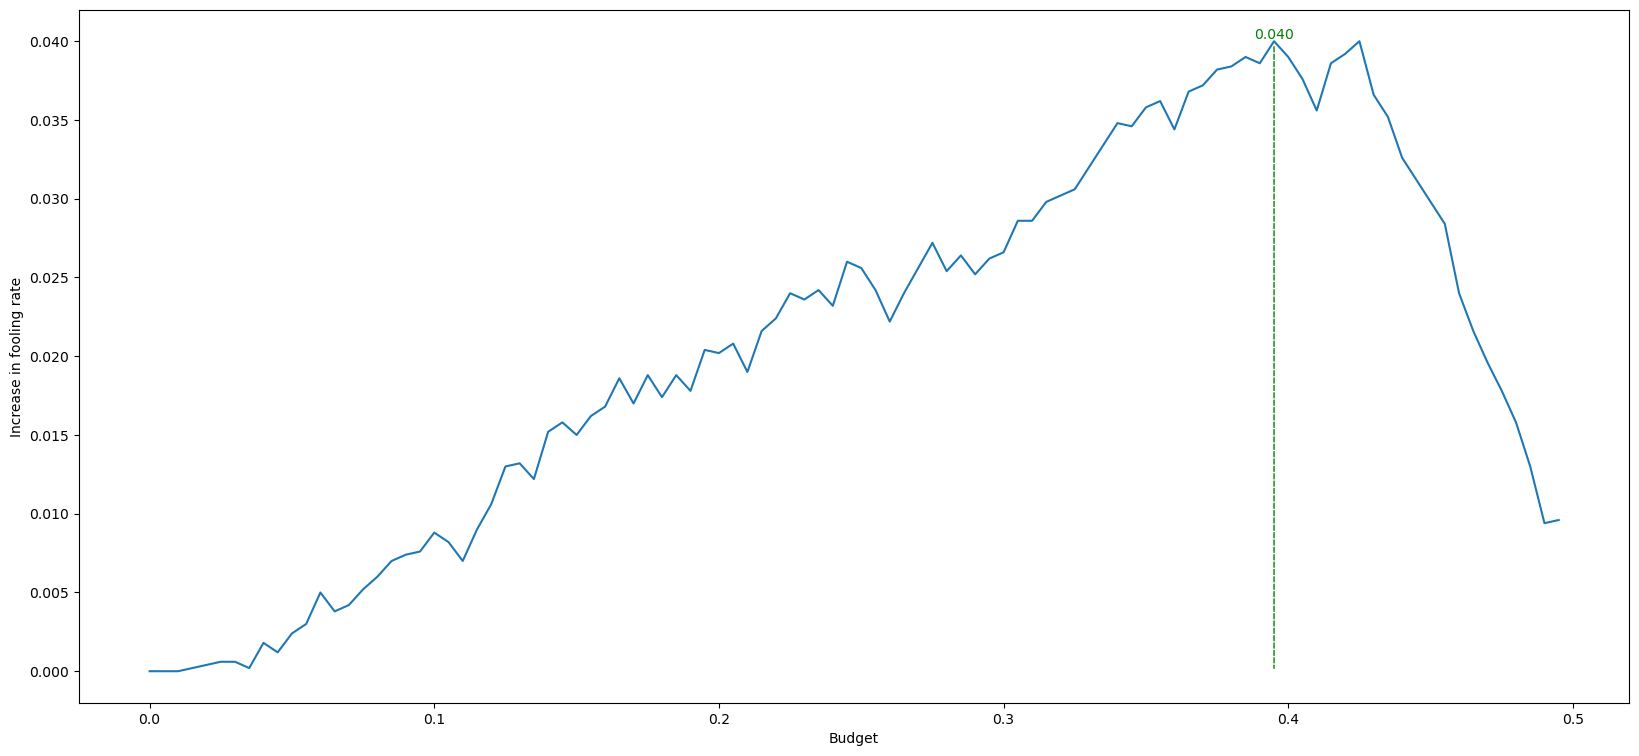

In [6]:
plt.figure(figsize=(20,9))
plt.plot(budget, fr_diff)
plt.xlabel('Budget')
plt.ylabel('Increase in fooling rate')
# plt.annotate(text=f'{max_diff:.3f}', ha = "center", va="bottom", xy=(max_budget, 0.), xytext=(max_budget, max_diff), arrowprops={'arrowstyle': '-', 'color': 'green', 'ls': '--'}, color = 'green')
plt.savefig('./output/XOR/fooling_rates_increase_plain_Sigmoid.pdf', transparent=True, dpi=None)
plt.show()

# CIFAR10

In [72]:
non_linearity="ReLU"
budget, fr_TSSA = torch.load(f'./output/CIFAR10/fooling-rates/apgd-ossa-tssa/fooling_rates_compared_nsample=10000_start=0_nl={non_linearity}()_batch=0_TwoStepSpectralAttack_budget-rates.pt', map_location=torch.device('cpu'))
budget, fr_OSSA = torch.load(f'./output/CIFAR10/fooling-rates/apgd-ossa-tssa/fooling_rates_compared_nsample=10000_start=0_nl={non_linearity}()_batch=0_OneStepSpectralAttack_budget-rates.pt', map_location=torch.device('cpu'))
budget, fr_AA = torch.load(f'./output/CIFAR10/fooling-rates/aa/fooling_rates_compared_nsample=10000_start=0_nl={non_linearity}()_batch=0_AdversarialAutoAttack_budget-rates.pt', map_location=torch.device('cpu'))
budget, fr_APGD = torch.load(f'./output/CIFAR10/fooling-rates/apgd-ossa-tssa/fooling_rates_compared_nsample=10000_start=0_nl={non_linearity}()_batch=0_APGDAttack_budget-rates.pt', map_location=torch.device('cpu'))
fr_TSSA, fr_OSSA, fr_AA, fr_APGD = torch.tensor(fr_TSSA), torch.tensor(fr_OSSA), torch.tensor(fr_AA), torch.tensor(fr_APGD)

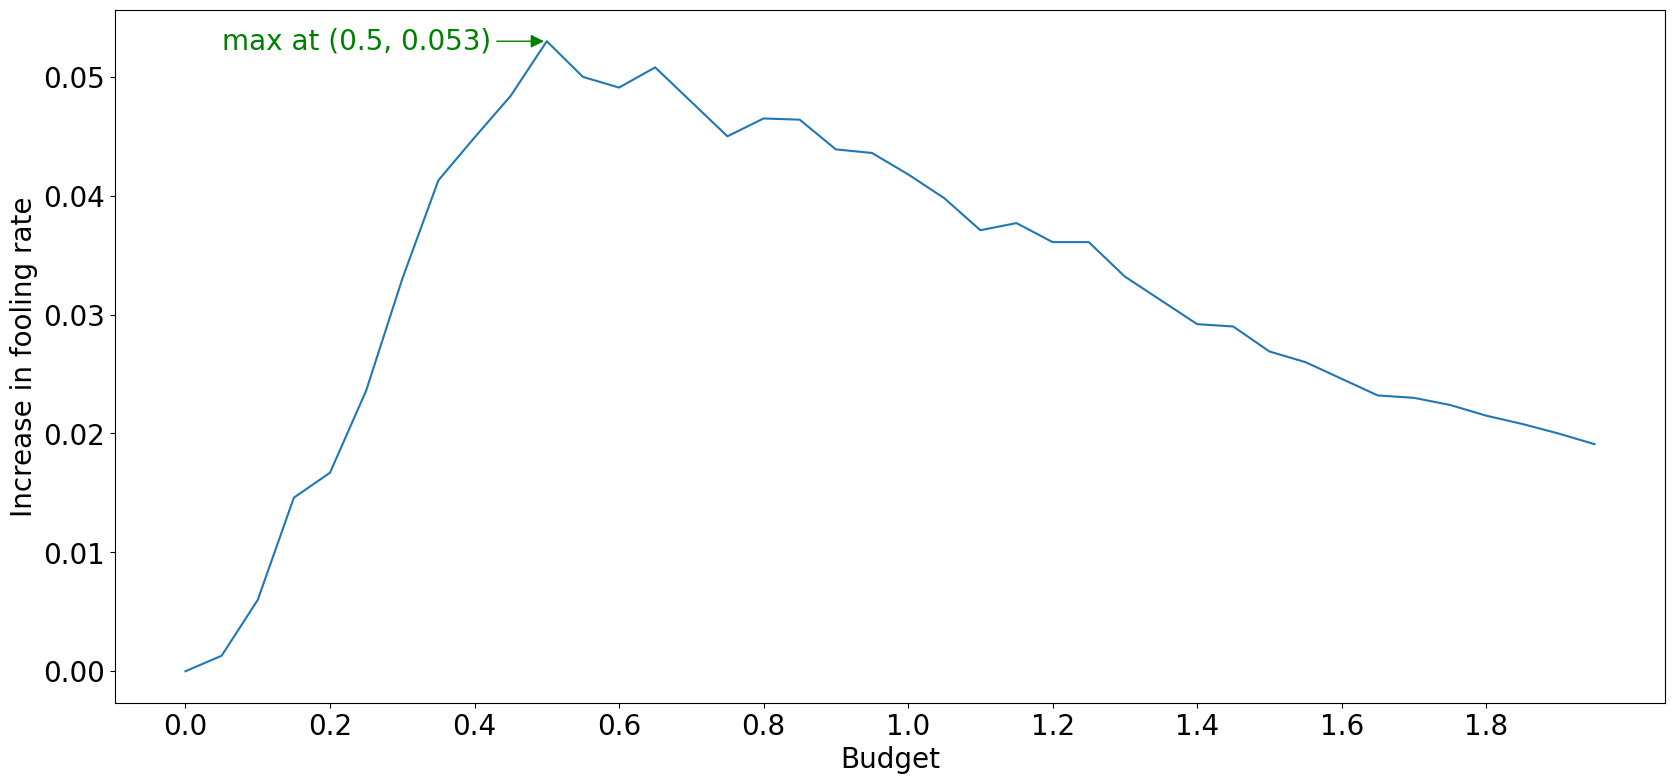

In [73]:
fr_diff = fr_TSSA - fr_OSSA
max_index = torch.argmax(fr_diff)
max_budget = budget[max_index]
max_diff = fr_diff[max_index]


plt.figure(figsize=(20,9))
plt.plot(budget, fr_diff)
plt.xlabel('Budget')
plt.ylabel('Increase in fooling rate')
plt.xticks(torch.arange(0,2,0.2))
plt.annotate(text=f'max at ({max_budget:.1f}, {max_diff:.3f})', ha='right', va='center', xy=(max_budget, max_diff), color="green", textcoords=('offset fontsize'), xytext=(-2, 0), arrowprops={'color': 'green', 'arrowstyle': '-|>'},)
# plt.annotate(text=f'{max_diff:.3f}', ha = "center", va="bottom", xy=(max_budget, 0.), xytext=(max_budget, max_diff), arrowprops={'arrowstyle': '-', 'color': 'green', 'ls': '--'}, color = 'green')
# plt.annotate(text=f'{max_diff:.3f}', ha = "right", va="center", xy=(max_budget, max_diff), xytext=(0., max_diff), arrowprops={'arrowstyle': '-', 'color': 'green', 'ls': '--'}, color = 'green')
# plt.annotate(text=f'{max_budget:.1f}', ha = "center", va="top", xy=(max_budget, max_diff), xytext=(max_budget, 0.), arrowprops={'arrowstyle': '-', 'color': 'green', 'ls': '--'}, color = 'green')
plt.savefig(f'./output/CIFAR10/fooling-rates/fooling_rates_increase_nsample=10000_nl={non_linearity}_tssa-ossa_plain.pdf', transparent=True, dpi=None)
plt.show()

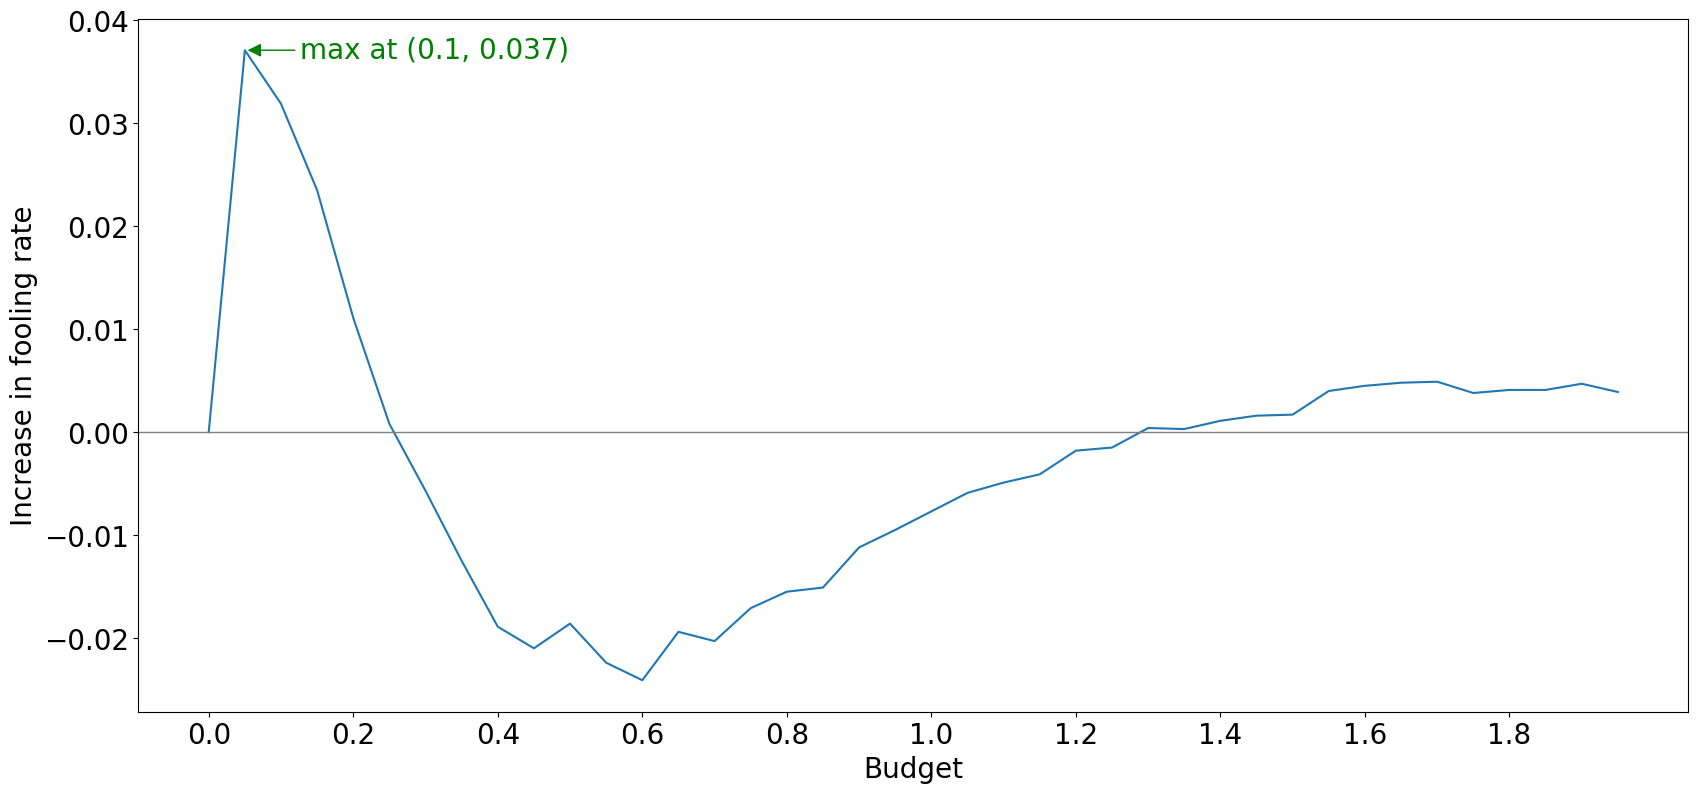

In [74]:
fr_diff = fr_TSSA - fr_AA
max_index = torch.argmax(fr_diff)
max_budget = budget[max_index]
max_diff = fr_diff[max_index]

plt.figure(figsize=(20,9))
plt.plot(budget, fr_diff)
plt.xlabel('Budget')
plt.ylabel('Increase in fooling rate')
plt.xticks(torch.arange(0,2,0.2))
plt.axhline(0, color='grey', lw='1')
plt.annotate(text=f'max at ({max_budget:.1f}, {max_diff:.3f})', ha='left', va='center', xy=(max_budget, max_diff), color="green", textcoords=('offset fontsize'), xytext=(2, 0), arrowprops={'color': 'green', 'arrowstyle': '-|>'},)
# plt.annotate(text=f'{max_diff:.3f}', ha = "center", va="bottom", xy=(max_budget, 0.), xytext=(max_budget, max_diff), arrowprops={'arrowstyle': '-', 'color': 'green', 'ls': '--'}, color = 'green')
# plt.annotate(text=f'{max_diff:.3f}', ha = "right", va="center", xy=(max_budget, max_diff), xytext=(0., max_diff), arrowprops={'arrowstyle': '-', 'color': 'green', 'ls': '--'}, color = 'green')
# plt.annotate(text=f'{max_budget:.1f}', ha = "center", va="top", xy=(max_budget, max_diff), xytext=(max_budget, 0.), arrowprops={'arrowstyle': '-', 'color': 'green', 'ls': '--'}, color = 'green')
# plt.savefig('./output/Dormammu/MNIST/fooling_rates_increase_plain.pdf', transparent=True, dpi=None)
plt.savefig(f'./output/CIFAR10/fooling-rates/fooling_rates_increase_nsample=10000_nl={non_linearity}_tssa-aa_plain.pdf', transparent=True, dpi=None)
plt.show()

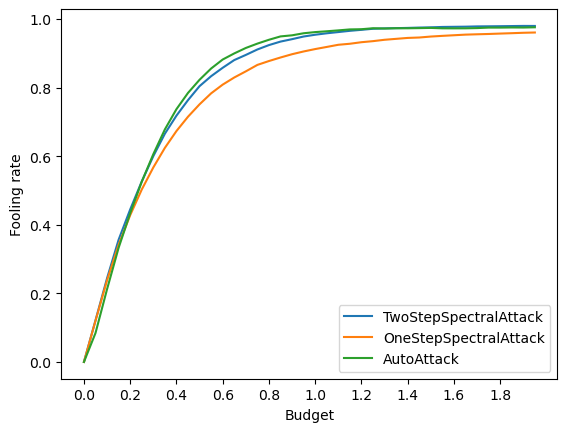

In [81]:
plt.rcParams.update({'font.size': 10})
plt.plot(budget, fr_TSSA, label="TwoStepSpectralAttack")
plt.plot(budget, fr_OSSA, label="OneStepSpectralAttack")
# plt.plot(budget, fr_APGD, label="APGDAttack")
plt.plot(budget, fr_AA, label="AutoAttack")
plt.legend()
plt.xlabel('Budget')
plt.ylabel('Fooling rate')
plt.xticks(torch.arange(0,2,0.2))
# plt.savefig(f'./output/CIFAR10/fooling-rates/ossa-tssa/fooling_rates_compared_nsample=10000_start=0_nl={non_linearity}_batch=0.pdf', transparent=True, dpi=None)
plt.savefig(f'./output/CIFAR10/fooling-rates/aa-ossa-tssa/fooling_rates_compared_nsample=10000_start=0_nl={non_linearity}_batch=0.pdf', transparent=True, dpi=None)
plt.show()

In [4]:
budgets, points_APGD, attack_APGD = torch.load("../code_outputs/thanos/CIFAR10/save-attacks/attacks_nsample=10000_start=0_merged_APGDAttack_budget-points-attack_good_order.pt")

In [23]:
del points_APGD
del attack_APGD

In [24]:
budgets, points_TSSA, attack_TSSA = torch.load("../code_outputs/thanos/CIFAR10/save-attacks/attacks_nsample=10000_start=0_merged_TwoStepSpectralAttack_budget-points-attack_good_order.pt")

In [3]:
budgets, points_AA, attack_AA = torch.load("../code_outputs/thanos/CIFAR10/save-attacks/attacks_nsample=10000_start=0_nl=ReLU()_batch=0_AdversarialAutoAttack_budget-points-attack.pt", map_location=torch.device('cpu'))

In [4]:
from ipywidgets import interactive

In [82]:
merde = torch.isclose(points_AA, points_APGD).int().flatten(1).prod(dim=1)
i = torch.argmin(merde)
print(i)
ou_es_tu = torch.isclose(points_APGD, points_AA[i+1].unsqueeze(0)).int().flatten(1).prod(dim=1)
print(ou_es_tu.argmax())
# print(torch.argmin())

tensor(200)
tensor(2201)


In [7]:
import cifar_networks
import torchvision.transforms as transforms
from torch import nn

import torchvision.datasets as datasets
from geometry import GeometricModel
non_linearity = 'ReLU'

if non_linearity == 'Sigmoid':
    raise NotImplemented
    checkpoint_path = './checkpoint/VGG11-lr=0.1/cifar10_medium_cnn_30_Sigmoid.pt'
    non_linearity = nn.Sigmoid()
elif non_linearity == 'ReLU':
    checkpoint_path = './checkpoint/VGG11-lr=0.1/cifar10_medium_cnn_30_ReLU.pt'
    non_linearity = nn.ReLU()
network = cifar_networks.medium_cnn(checkpoint_path, non_linearity=non_linearity)
network_score = cifar_networks.medium_cnn(checkpoint_path, score=True, non_linearity=non_linearity)

transform = transforms.Compose(
    [transforms.ToTensor(),
    ])

input_space = datasets.CIFAR10(
    "data",
    train=False,
    download=True,
    transform=transform,
)
GeoModel = GeometricModel(network, network_score)

Files already downloaded and verified


In [30]:
print(input_space)

Dataset CIFAR10
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
           )


In [22]:
def show_attack_APGD(ipoint, ibudget):
    print(f"ɛ={budgets[ibudget]:.2}\np = {GeoModel.proba((points_APGD[ipoint] + attack_APGD[ibudget][ipoint])).detach().squeeze()}")
    plt.imshow((points_APGD + attack_APGD[ibudget]).moveaxis(1, -1)[ipoint])
    plt.show()

interactive(show_attack_APGD,
            ipoint=range(0, len(points_APGD) - 1, 1),
            ibudget=(0, len(attack_APGD) - 1, 1))

interactive(children=(Dropdown(description='ipoint', options=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14…

In [25]:
def show_attack_TSSA(ipoint, ibudget):
    print(f"ɛ={budgets[ibudget]:.2}\np = {GeoModel.proba((points_TSSA[ipoint] + attack_TSSA[ibudget][ipoint])).detach().squeeze()}")
    plt.imshow((points_TSSA + attack_TSSA[ibudget]).moveaxis(1, -1)[ipoint])
    plt.show()

interactive(show_attack_TSSA,
            ipoint=range(0, len(points_TSSA) - 1, 1),
            ibudget=(0, len(attack_TSSA) - 1, 1))

interactive(children=(Dropdown(description='ipoint', options=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14…

In [11]:
def show_attack_AA(ipoint, ibudget):
    print(f"True label: {input_space[ipoint][1]}")
    print(f"ɛ={budgets[ibudget]:.2}\np = {GeoModel.proba((points_AA[ipoint] + attack_AA[ibudget][ipoint]).unsqueeze(0)).detach().squeeze()}")
    plt.imshow((points_AA + attack_AA[ibudget]).moveaxis(1, -1)[ipoint], interpolation="bilinear")
    plt.show()

interactive(show_attack_AA,
            ipoint=range(0, len(points_AA) - 1, 1),
            ibudget=(0, len(attack_AA) - 1, 1))

interactive(children=(Dropdown(description='ipoint', options=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14…

In [18]:
correctly_predicted = 0
for (image, true_label) in input_space:
    predicted_label = GeoModel.proba(image).argmax(dim=1, keepdim=True)
    correctly_predicted += predicted_label.eq(torch.tensor(true_label).view_as(predicted_label)).sum().item()
print(f'{correctly_predicted} correctly predicted out of {len(input_space)}')

2646 correctly predicted out of 10000


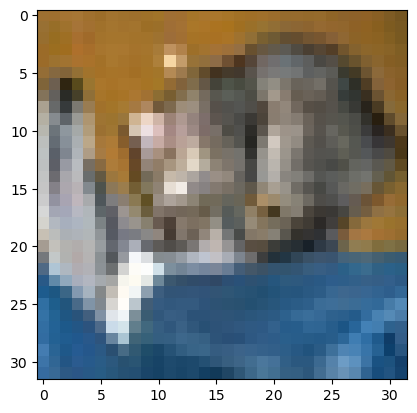

In [34]:
plt.imshow(points_AA.moveaxis(1, -1)[i])
plt.show()